# Loan Data Model Predictor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('loan_data.csv')

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
df['not.fully.paid'].value_counts(normalize=True)

0    0.839946
1    0.160054
Name: not.fully.paid, dtype: float64

## Modelling With Imbalance target class

#### Feature Engineering Non Numeric Features

In [5]:
target = df['not.fully.paid']
features = df.drop('not.fully.paid',axis=1)

In [6]:
features['purpose'] = features['purpose'].astype('category')

In [7]:
features['purpose'].cat.categories = list(range(0,7))

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report

In [9]:
def class_report_by_algo(x,y,model):
    X_train,X_test,y_train,y_test = train_test_split(x,y)
    clf = model()
    clf.fit(X_train,y_train)
    
    prediction_test = clf.predict(X_test)
    prediction_train = clf.predict(X_train)
    print('Class Report Data Test')
    print(classification_report(y_test,prediction_test))
    print('====================')
    print('Class Report Data Train')
    print(classification_report(y_train,prediction_train))

In [10]:
class_report_by_algo(features,target,LogisticRegression)

Class Report Data Test
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2006
           1       0.28      0.01      0.02       389

   micro avg       0.83      0.83      0.83      2395
   macro avg       0.56      0.50      0.47      2395
weighted avg       0.75      0.83      0.77      2395

Class Report Data Train
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      6039
           1       0.47      0.02      0.04      1144

   micro avg       0.84      0.84      0.84      7183
   macro avg       0.66      0.51      0.47      7183
weighted avg       0.78      0.84      0.77      7183



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [11]:
class_report_by_algo(features,target,DecisionTreeClassifier)

Class Report Data Test
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2015
           1       0.22      0.25      0.23       380

   micro avg       0.74      0.74      0.74      2395
   macro avg       0.53      0.54      0.54      2395
weighted avg       0.75      0.74      0.74      2395

Class Report Data Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6030
           1       1.00      1.00      1.00      1153

   micro avg       1.00      1.00      1.00      7183
   macro avg       1.00      1.00      1.00      7183
weighted avg       1.00      1.00      1.00      7183



In [12]:
class_report_by_algo(features,target,RandomForestClassifier)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Class Report Data Test
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2010
           1       0.37      0.04      0.08       385

   micro avg       0.83      0.83      0.83      2395
   macro avg       0.61      0.51      0.49      2395
weighted avg       0.77      0.83      0.78      2395

Class Report Data Train
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      6035
           1       1.00      0.86      0.92      1148

   micro avg       0.98      0.98      0.98      7183
   macro avg       0.99      0.93      0.95      7183
weighted avg       0.98      0.98      0.98      7183



In [13]:
class_report_by_algo(features,target,GradientBoostingClassifier)

Class Report Data Test
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1998
           1       0.58      0.03      0.05       397

   micro avg       0.84      0.84      0.84      2395
   macro avg       0.71      0.51      0.48      2395
weighted avg       0.79      0.84      0.77      2395

Class Report Data Train
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      6047
           1       0.93      0.09      0.17      1136

   micro avg       0.86      0.86      0.86      7183
   macro avg       0.89      0.55      0.54      7183
weighted avg       0.87      0.86      0.80      7183



## Handling Imbalance Data

### Undersampling

In [14]:
a = list(range(1,100))

In [15]:
minority_data = df[df['not.fully.paid'] == 1]
mayority_data = df[df['not.fully.paid'] == 0]

In [16]:
len(minority_data)

1533

In [17]:
index_for_mayority = np.random.choice(mayority_data.index, len(minority_data))

In [18]:
df_class_0 = df.loc[index_for_mayority]

In [19]:
undersampling_df = pd.concat([df_class_0,minority_data])

In [20]:
undersampling_df['not.fully.paid'].value_counts(normalize=True)

1    0.5
0    0.5
Name: not.fully.paid, dtype: float64

### Modelling With Undersampling Data

#### Feature Engineering 

In [21]:
undersampling_df = pd.get_dummies(undersampling_df,columns=['purpose'],drop_first=True)

In [22]:
x_under, y_under = undersampling_df.drop('not.fully.paid',axis=1) , undersampling_df['not.fully.paid']

In [23]:
class_report_by_algo(x_under,y_under,LogisticRegression)

Class Report Data Test
              precision    recall  f1-score   support

           0       0.59      0.69      0.63       374
           1       0.65      0.54      0.59       393

   micro avg       0.61      0.61      0.61       767
   macro avg       0.62      0.62      0.61       767
weighted avg       0.62      0.61      0.61       767

Class Report Data Train
              precision    recall  f1-score   support

           0       0.59      0.66      0.62      1159
           1       0.61      0.53      0.56      1140

   micro avg       0.60      0.60      0.60      2299
   macro avg       0.60      0.59      0.59      2299
weighted avg       0.60      0.60      0.59      2299



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [24]:
class_report_by_algo(x_under,y_under,DecisionTreeClassifier)

Class Report Data Test
              precision    recall  f1-score   support

           0       0.57      0.61      0.59       384
           1       0.58      0.53      0.55       383

   micro avg       0.57      0.57      0.57       767
   macro avg       0.57      0.57      0.57       767
weighted avg       0.57      0.57      0.57       767

Class Report Data Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1149
           1       1.00      1.00      1.00      1150

   micro avg       1.00      1.00      1.00      2299
   macro avg       1.00      1.00      1.00      2299
weighted avg       1.00      1.00      1.00      2299



In [25]:
class_report_by_algo(x_under,y_under,RandomForestClassifier)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Class Report Data Test
              precision    recall  f1-score   support

           0       0.58      0.65      0.61       382
           1       0.61      0.53      0.56       385

   micro avg       0.59      0.59      0.59       767
   macro avg       0.59      0.59      0.59       767
weighted avg       0.59      0.59      0.59       767

Class Report Data Train
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1151
           1       0.99      0.98      0.99      1148

   micro avg       0.99      0.99      0.99      2299
   macro avg       0.99      0.99      0.99      2299
weighted avg       0.99      0.99      0.99      2299



In [26]:
class_report_by_algo(x_under,y_under,GradientBoostingClassifier)

Class Report Data Test
              precision    recall  f1-score   support

           0       0.60      0.60      0.60       384
           1       0.60      0.59      0.59       383

   micro avg       0.60      0.60      0.60       767
   macro avg       0.60      0.60      0.60       767
weighted avg       0.60      0.60      0.60       767

Class Report Data Train
              precision    recall  f1-score   support

           0       0.73      0.78      0.75      1149
           1       0.76      0.72      0.74      1150

   micro avg       0.75      0.75      0.75      2299
   macro avg       0.75      0.75      0.75      2299
weighted avg       0.75      0.75      0.75      2299



### Oversampling

#### Random Oversampling

In [27]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [28]:
ros = RandomOverSampler()

In [29]:
X_ros , y_ros = ros.fit_sample(features,target)

In [30]:
df_over_all = pd.DataFrame(X_ros,columns=features.columns)
df_over_all['not.fully.paid'] = y_ros

In [31]:
df_over_all['not.fully.paid'].value_counts()

1    8045
0    8045
Name: not.fully.paid, dtype: int64

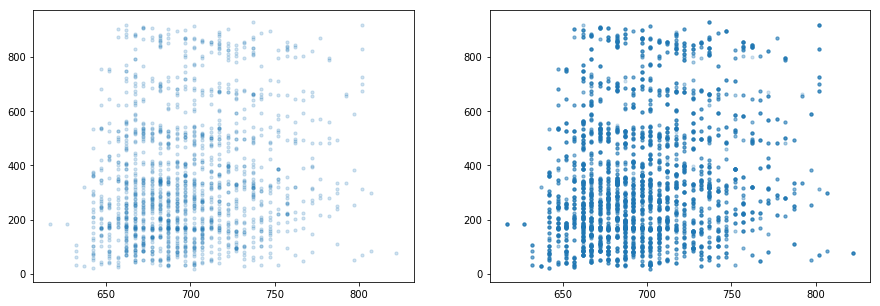

In [32]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax[0].scatter(df[df['not.fully.paid'] == 1]['fico'] ,
              df[df['not.fully.paid'] == 1]['installment'] ,s=10 , alpha=0.2)
ax[1].scatter(df_over_all[df_over_all['not.fully.paid'] == 1]['fico'] ,
              df_over_all[df_over_all['not.fully.paid'] == 1]['installment'] ,s=10 , alpha=0.2)

In [33]:
class_report_by_algo(df_over_all.drop('not.fully.paid',axis=1) , df_over_all['not.fully.paid'] , LogisticRegression)

Class Report Data Test
              precision    recall  f1-score   support

           0       0.59      0.64      0.61      2041
           1       0.59      0.55      0.57      1982

   micro avg       0.59      0.59      0.59      4023
   macro avg       0.59      0.59      0.59      4023
weighted avg       0.59      0.59      0.59      4023

Class Report Data Train
              precision    recall  f1-score   support

           0       0.60      0.64      0.62      6004
           1       0.62      0.57      0.59      6063

   micro avg       0.61      0.61      0.61     12067
   macro avg       0.61      0.61      0.61     12067
weighted avg       0.61      0.61      0.61     12067



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [34]:
class_report_by_algo(df_over_all.drop('not.fully.paid',axis=1) , 
                     df_over_all['not.fully.paid'] , DecisionTreeClassifier)

Class Report Data Test
              precision    recall  f1-score   support

           0       0.99      0.81      0.89      1978
           1       0.84      0.99      0.91      2045

   micro avg       0.90      0.90      0.90      4023
   macro avg       0.92      0.90      0.90      4023
weighted avg       0.92      0.90      0.90      4023

Class Report Data Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6067
           1       1.00      1.00      1.00      6000

   micro avg       1.00      1.00      1.00     12067
   macro avg       1.00      1.00      1.00     12067
weighted avg       1.00      1.00      1.00     12067



In [35]:
class_report_by_algo(X_ros,y_ros,RandomForestClassifier)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Class Report Data Test
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1965
           1       0.94      0.98      0.96      2058

   micro avg       0.95      0.95      0.95      4023
   macro avg       0.95      0.95      0.95      4023
weighted avg       0.95      0.95      0.95      4023

Class Report Data Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6080
           1       1.00      1.00      1.00      5987

   micro avg       1.00      1.00      1.00     12067
   macro avg       1.00      1.00      1.00     12067
weighted avg       1.00      1.00      1.00     12067



In [36]:
class_report_by_algo(X_ros,y_ros,GradientBoostingClassifier)

Class Report Data Test
              precision    recall  f1-score   support

           0       0.68      0.70      0.69      2034
           1       0.68      0.66      0.67      1989

   micro avg       0.68      0.68      0.68      4023
   macro avg       0.68      0.68      0.68      4023
weighted avg       0.68      0.68      0.68      4023

Class Report Data Train
              precision    recall  f1-score   support

           0       0.70      0.72      0.71      6011
           1       0.71      0.69      0.70      6056

   micro avg       0.71      0.71      0.71     12067
   macro avg       0.71      0.71      0.71     12067
weighted avg       0.71      0.71      0.71     12067



In [37]:
def class_report_by_algo_oversampling(x,y,model):
    X_train,X_test,y_train,y_test = train_test_split(x,y)
    clf = model()
    ros = RandomOverSampler(random_state=101)
    X_ros, y_ros = ros.fit_sample(X_train,y_train)
    
    clf.fit(X_ros,y_ros)
    
    prediction_test = clf.predict(X_test)
    prediction_train = clf.predict(X_ros)
    print('Class Report Data Test')
    print(classification_report(y_test,prediction_test))
    print('====================')
    print('Class Report Data Train')
    print(classification_report(y_ros,prediction_train))

In [38]:
class_report_by_algo_oversampling(features,target,DecisionTreeClassifier)

Class Report Data Test
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1999
           1       0.19      0.19      0.19       396

   micro avg       0.74      0.74      0.74      2395
   macro avg       0.52      0.52      0.52      2395
weighted avg       0.73      0.74      0.73      2395

Class Report Data Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6046
           1       1.00      1.00      1.00      6046

   micro avg       1.00      1.00      1.00     12092
   macro avg       1.00      1.00      1.00     12092
weighted avg       1.00      1.00      1.00     12092



In [39]:
class_report_by_algo_oversampling(features,target,GradientBoostingClassifier)

Class Report Data Test
              precision    recall  f1-score   support

           0       0.90      0.67      0.77      2042
           1       0.23      0.56      0.32       353

   micro avg       0.65      0.65      0.65      2395
   macro avg       0.56      0.61      0.54      2395
weighted avg       0.80      0.65      0.70      2395

Class Report Data Train
              precision    recall  f1-score   support

           0       0.73      0.71      0.72      6003
           1       0.72      0.74      0.73      6003

   micro avg       0.72      0.72      0.72     12006
   macro avg       0.72      0.72      0.72     12006
weighted avg       0.72      0.72      0.72     12006



### SMOTE

#### Syntetic Minority Over Sampling

In [40]:
sm = SMOTE(random_state=101)

In [41]:
X_sm, y_sm = sm.fit_sample(features,target)

In [42]:
df_smote_all = pd.DataFrame(X_sm,columns=features.columns)

In [43]:
df_smote_all['not.fully.paid'] = y_sm

In [44]:
df_smote_all['not.fully.paid'].value_counts()

1    8045
0    8045
Name: not.fully.paid, dtype: int64

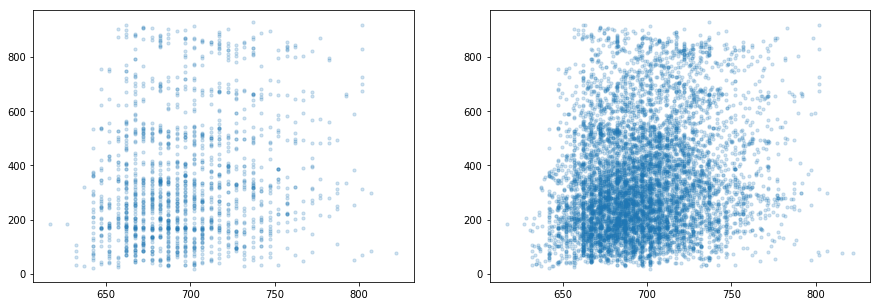

In [45]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax[0].scatter(df[df['not.fully.paid'] == 1]['fico'] ,
              df[df['not.fully.paid'] == 1]['installment'] ,s=10 , alpha=0.2)
ax[1].scatter(df_smote_all[df_smote_all['not.fully.paid'] == 1]['fico'] ,
              df_smote_all[df_smote_all['not.fully.paid'] == 1]['installment'] ,s=10 , alpha=0.2)

In [46]:
def class_report_by_algo_smote(x,y,model):
    X_train,X_test,y_train,y_test = train_test_split(x,y)
    clf = model()
    ros = SMOTE(random_state=101)
    X_ros, y_ros = ros.fit_sample(X_train,y_train)
    
    clf.fit(X_ros,y_ros)
    
    prediction_test = clf.predict(X_test)
    prediction_train = clf.predict(X_ros)
    print('Class Report Data Test')
    print(classification_report(y_test,prediction_test))
    print('====================')
    print('Class Report Data Train')
    print(classification_report(y_ros,prediction_train))

In [47]:
class_report_by_algo_smote(features,target,DecisionTreeClassifier)

Class Report Data Test
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      2022
           1       0.21      0.28      0.24       373

   micro avg       0.73      0.73      0.73      2395
   macro avg       0.54      0.54      0.54      2395
weighted avg       0.76      0.73      0.74      2395

Class Report Data Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6023
           1       1.00      1.00      1.00      6023

   micro avg       1.00      1.00      1.00     12046
   macro avg       1.00      1.00      1.00     12046
weighted avg       1.00      1.00      1.00     12046



## Class Weight

In [51]:
X_train,X_test,y_train,y_test = train_test_split(features,target,random_state=101)

In [57]:
weight = {0 : 1 , 1 :8}

In [59]:
model_w_class_weight = DecisionTreeClassifier(random_state=101, 
                                              class_weight=weight, min_samples_leaf=50)

In [60]:
model_w_class_weight.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 8}, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=101,
            splitter='best')

In [61]:
prediction = model_w_class_weight.predict(X_test)

In [63]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.88      0.44      0.59      2029
           1       0.18      0.68      0.28       366

   micro avg       0.48      0.48      0.48      2395
   macro avg       0.53      0.56      0.44      2395
weighted avg       0.78      0.48      0.54      2395



## Ensemble Method

### Random Forest Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
rfc = RandomForestClassifier(min_samples_leaf=50 , class_weight={0:1 , 1:7},n_estimators=100)

In [83]:
rfc.fit(X_train,y_train)
prediction = rfc.predict(X_test)


In [84]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.90      0.51      0.65      2029
           1       0.20      0.70      0.32       366

   micro avg       0.54      0.54      0.54      2395
   macro avg       0.55      0.60      0.48      2395
weighted avg       0.80      0.54      0.60      2395



array([0, 1], dtype=int64)

In [89]:
from sklearn.tree import export_graphviz
export_graphviz(rfc.estimators_[0], out_file='rfc_1.dot', feature_names = features.columns,
                class_names = ['penuh','macet'],
                rounded = True, proportion = False, precision = 2, filled = True)

In [90]:
import pickle

In [91]:
pickle.dump(rfc , open('model_rfc.sav' , 'wb'))